In [159]:
# make matplot draw as diagram in this page, and this should be placed in the first cell 
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  #for draw diagram
import sklearn.cross_validation as cross_validation
import sklearn.ensemble as ensemble
import sklearn.linear_model as linear_model

# get data

In [25]:
c_f=pd.read_csv("data/Credit_develop.csv")
c_f.head()

,target,Branch_of_Bank,Area_Classification,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,...,Installment_Loan,Loan_Balance,Money_Market,Money_Market_Balance,Money_Market_Credits,Mortgage,Mortgage_Balance,Credit_Card_Balance,Credit_Card_Purchases,Safety_Deposit_Box
0,0,B1,U,53,5,0,5.0,88,0,1,...,0,0,0,0.00,0,0,0,107.19,0,0
1,0,B1,S,44,44,1,9.5,115,0,1,...,0,0,0,0.00,0,0,0,391.14,1,0
2,0,B1,S,50,64,1,7.5,119,0,1,...,0,0,1,15676.59,2,0,0,0.00,0,1
3,0,B1,U,26,124,1,8.0,156,0,1,...,0,0,0,0.00,0,0,0,673.10,0,1
4,0,B1,R,46,59,1,8.0,102,0,0,...,0,0,0,0.00,0,0,0,0.00,0,0


Area Classification???

# understand the data (explore the data

In [9]:
c_f.describe().T

,count,mean,std,min,25%,50%,75%,max
target,14000,0.500000,0.500018,0.00,0.0000,0.500,1.0000,1.00
Age,11365,48.060185,14.036543,16.00,38.0000,48.000,58.0000,94.00
Income,11536,40.656813,28.532530,0.00,20.0000,34.000,55.0000,233.00
Owns_Home,11666,0.544403,0.498046,0.00,0.0000,1.000,1.0000,1.00
Length_of_Residence,11536,7.024532,2.818572,0.50,5.0000,7.000,9.0000,19.50
Home_Value,11536,111.560160,22.753332,68.00,98.0000,108.000,121.0000,625.00
Recent_Address_Change,14000,0.029000,0.167812,0.00,0.0000,0.000,0.0000,1.00
Local_Address,14000,0.953429,0.210727,0.00,1.0000,1.000,1.0000,1.00
Credit_Score,13803,667.996160,40.513174,507.00,641.0000,668.000,695.0000,815.00
Age_of_Oldest_Account,13059,56.572923,6.663725,2.00,55.7000,58.700,60.5000,63.20


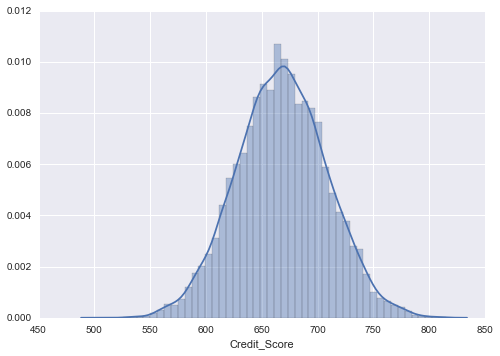

In [29]:
data=c_f["Credit_Score"].dropna()
sns.distplot(data)

{'boxes': [<matplotlib.lines.Line2D at 0x10afd9cd0>],
 'caps': [<matplotlib.lines.Line2D at 0x10aff6b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b002e90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b002850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10afd9e50>,
  <matplotlib.lines.Line2D at 0x10aff6550>]}

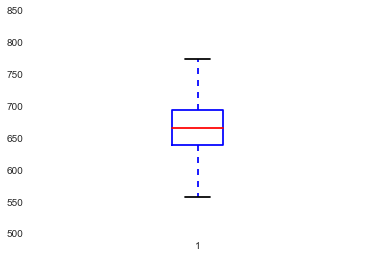

In [33]:
plt.boxplot(data)
#type(c_f)

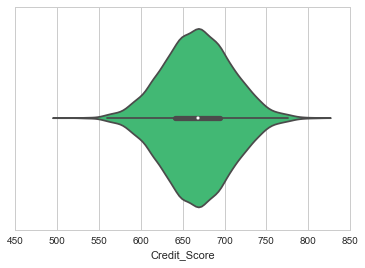

In [48]:
sns.set_style("whitegrid")
sns.violinplot(data,color="#2ecc71") #violin box + density, 显示在什么地方分布比较密集

In [55]:
model_data=c_f.drop_duplicates() #acturally there is no duplicates, the size is always 658000 , the len is 14000 
model_data=model_data.fillna(0) # or fillna(model_data.mean())  填充缺失值

## by far, the data preparation is ok, now to choose the 自变量
相似度分析

In [61]:
simpler = np.random.randint(0,len(model_data),size=50)
# model_data.iloc[simpler,3:] #model_data 随机50行， 和第四列以后的列

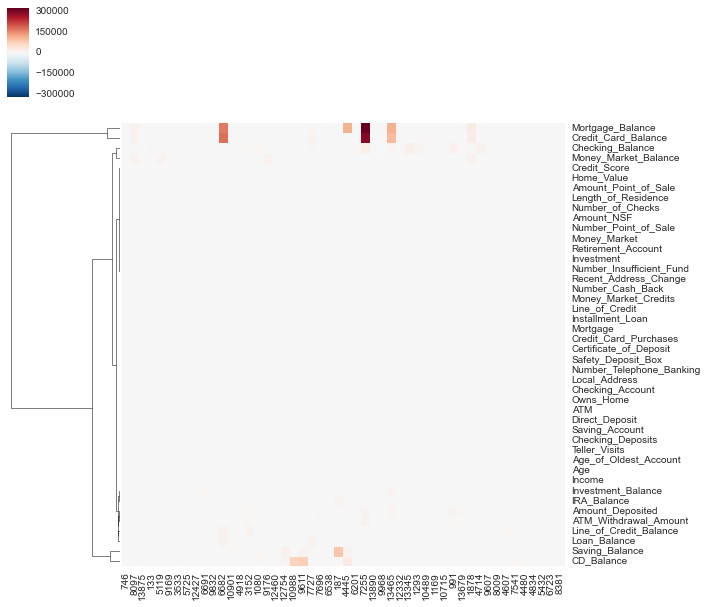

In [63]:
# 聚合热力图
sns.clustermap(model_data.iloc[simpler,3:].T,col_cluster=False, row_cluster=True)

# split training data and test data
convert 类别变量=> 哑元变量 [R,S,U] 变成3列， R=1 S=0,U=0 等等

In [66]:
Area_classifications_dummy=pd.get_dummies(model_data["Area_Classification"],prefix="Area_Class")

In [69]:
model_data.join(Area_classifications_dummy)

,target,Branch_of_Bank,Area_Classification,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,...,Money_Market_Balance,Money_Market_Credits,Mortgage,Mortgage_Balance,Credit_Card_Balance,Credit_Card_Purchases,Safety_Deposit_Box,Area_Class_R,Area_Class_S,Area_Class_U
0,0,B1,U,53,5,0,5.0,88,0,1,...,0.00,0,0,0.00,107.19,0,0,0,0,1
1,0,B1,S,44,44,1,9.5,115,0,1,...,0.00,0,0,0.00,391.14,1,0,0,1,0
2,0,B1,S,50,64,1,7.5,119,0,1,...,15676.59,2,0,0.00,0.00,0,1,0,1,0
3,0,B1,U,26,124,1,8.0,156,0,1,...,0.00,0,0,0.00,673.10,0,1,0,0,1
4,0,B1,R,46,59,1,8.0,102,0,0,...,0.00,0,0,0.00,0.00,0,0,1,0,0
5,0,B1,U,0,0,0,0.0,0,1,0,...,0.00,0,0,0.00,0.00,0,0,0,0,1
6,0,B1,U,48,48,1,2.5,108,0,1,...,0.00,0,0,0.00,959.06,1,0,0,0,1
7,0,B1,S,45,11,0,7.5,128,0,1,...,0.00,0,0,0.00,0.00,0,0,0,1,0
8,0,B1,S,61,25,0,5.5,112,0,1,...,0.00,0,0,0.00,0.00,0,0,0,1,0
9,0,B1,R,77,22,1,10.0,94,0,1,...,0.00,0,0,0.00,0.00,0,1,1,0,0


In [70]:
model_data.join(pd.get_dummies(model_data["Branch_of_Bank"],prefix="Branch"))

,target,Branch_of_Bank,Area_Classification,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,...,Branch_B18,Branch_B19,Branch_B2,Branch_B3,Branch_B4,Branch_B5,Branch_B6,Branch_B7,Branch_B8,Branch_B9
0,0,B1,U,53,5,0,5.0,88,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,B1,S,44,44,1,9.5,115,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,B1,S,50,64,1,7.5,119,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,B1,U,26,124,1,8.0,156,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,B1,R,46,59,1,8.0,102,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,B1,U,0,0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,B1,U,48,48,1,2.5,108,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,B1,S,45,11,0,7.5,128,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,B1,S,61,25,0,5.5,112,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,B1,R,77,22,1,10.0,94,0,1,...,0,0,0,0,0,0,0,0,0,0


* 区分目标变量 和因变量(dependent varible)

In [84]:
target=model_data["target"]
pd.crosstab(target,"target_col") #查看target 有多少种数值，每种各多少,没有改变target

col_0,target_col
target,
0,7000
1,7000


In [86]:
data=model_data.ix[:,'Age':] #ix()select all row, cloume 'Age' + include age. Remove columns before Age
data.head()

,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,Credit_Score,Age_of_Oldest_Account,Checking_Account,...,Installment_Loan,Loan_Balance,Money_Market,Money_Market_Balance,Money_Market_Credits,Mortgage,Mortgage_Balance,Credit_Card_Balance,Credit_Card_Purchases,Safety_Deposit_Box
0,53,5,0,5.0,88,0,1,673,55.0,0,...,0,0,0,0.00,0,0,0,107.19,0,0
1,44,44,1,9.5,115,0,1,668,62.8,1,...,0,0,0,0.00,0,0,0,391.14,1,0
2,50,64,1,7.5,119,0,1,638,58.7,1,...,0,0,1,15676.59,2,0,0,0.00,0,1
3,26,124,1,8.0,156,0,1,645,59.0,1,...,0,0,0,0.00,0,0,0,673.10,0,1
4,46,59,1,8.0,102,0,0,682,59.3,0,...,0,0,0,0.00,0,0,0,0.00,0,0


In [90]:
train_data, test_data, train_target, test_target=cross_validation.train_test_split(data,target,test_size=0.4,random_state=0)

# 筛选变量

In [94]:
corr_matrix=model_data.corr(method='pearson')
corr_matrix

,target,Age,Income,Owns_Home,Length_of_Residence,Home_Value,Recent_Address_Change,Local_Address,Credit_Score,Age_of_Oldest_Account,...,Installment_Loan,Loan_Balance,Money_Market,Money_Market_Balance,Money_Market_Credits,Mortgage,Mortgage_Balance,Credit_Card_Balance,Credit_Card_Purchases,Safety_Deposit_Box
target,1.000000,-0.032431,0.002540,-0.020230,-0.000251,-0.018060,0.008513,0.042033,-0.151535,-0.057514,...,0.018403,0.013149,-0.139507,-0.134623,-0.076317,0.004854,-0.007514,-0.027433,-0.078145,-0.043715
Age,-0.032431,1.000000,0.318505,0.412747,0.689291,0.680420,0.000528,0.012791,0.293842,0.012521,...,-0.004341,-0.002013,-0.008816,-0.007323,-0.003093,0.001265,0.001654,-0.006075,0.002461,-0.014013
Income,0.002540,0.318505,1.000000,0.271180,0.311827,0.710242,0.009868,0.011243,-0.079080,-0.000896,...,0.000797,0.000262,-0.008715,-0.008410,-0.011166,0.011235,0.014424,0.006004,0.000355,-0.003050
Owns_Home,-0.020230,0.412747,0.271180,1.000000,0.685386,0.304140,-0.003573,0.000528,0.078963,0.007889,...,0.006776,0.006979,0.006099,0.003823,-0.003796,0.246247,0.155871,0.137663,0.053482,-0.004434
Length_of_Residence,-0.000251,0.689291,0.311827,0.685386,1.000000,0.594952,0.004368,0.002602,0.060769,0.013207,...,-0.009774,-0.007903,-0.015014,-0.014568,-0.011308,0.006974,0.006833,-0.003147,-0.003822,-0.009893
Home_Value,-0.018060,0.680420,0.710242,0.304140,0.594952,1.000000,0.008625,0.027494,-0.039065,0.003742,...,-0.003744,-0.001543,-0.006874,0.020822,-0.004101,0.009663,0.013752,0.005121,0.003523,-0.009612
Recent_Address_Change,0.008513,0.000528,0.009868,-0.003573,0.004368,0.008625,1.000000,-0.000186,-0.008826,0.000900,...,0.011390,0.011692,-0.000124,0.009216,-0.000291,-0.040210,-0.025595,-0.021166,-0.004844,-0.008282
Local_Address,0.042033,0.012791,0.011243,0.000528,0.002602,0.027494,-0.000186,1.000000,0.013042,0.038879,...,0.036515,0.035541,-0.086097,-0.064229,-0.039194,0.006888,0.012337,0.013920,0.021188,-0.009061
Credit_Score,-0.151535,0.293842,-0.079080,0.078963,0.060769,-0.039065,-0.008826,0.013042,1.000000,0.037298,...,-0.007676,-0.007016,0.009292,0.014338,0.002845,-0.000677,0.002421,0.001048,0.007593,-0.002093
Age_of_Oldest_Account,-0.057514,0.012521,-0.000896,0.007889,0.013207,0.003742,0.000900,0.038879,0.037298,1.000000,...,-0.023547,-0.022771,-0.039930,-0.040241,-0.034016,-0.014223,0.017125,0.008353,-0.019431,0.002507


In [96]:
corr_matrix=corr_matrix.abs()

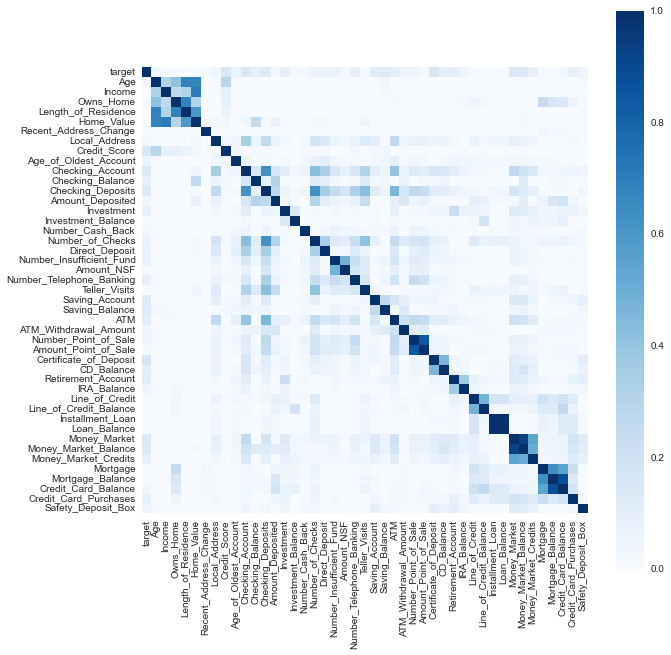

In [100]:
sns.set(rc={"figure.figsize":(10,10)}) #key "figure.figsize", value (10,10)
sns.heatmap(corr_matrix, square=True, cmap='Blues')

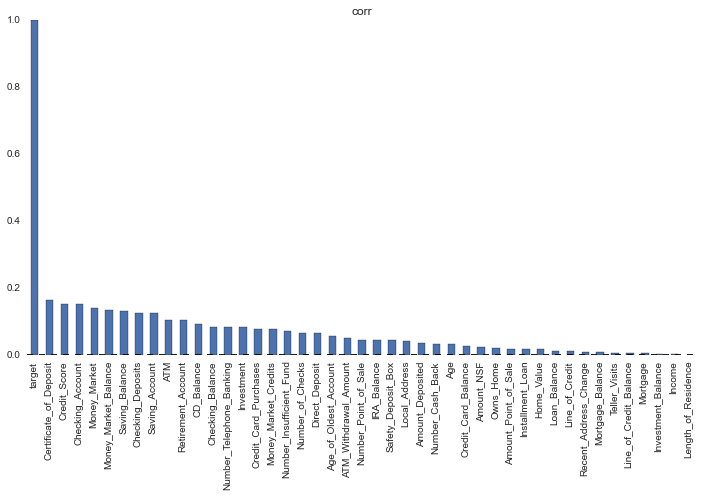

In [155]:
corr = model_data.corr(method='pearson').ix["target"].abs()
corr.sort(ascending=False)
corr.plot(kind="bar",title="corr",figsize=[12,6])

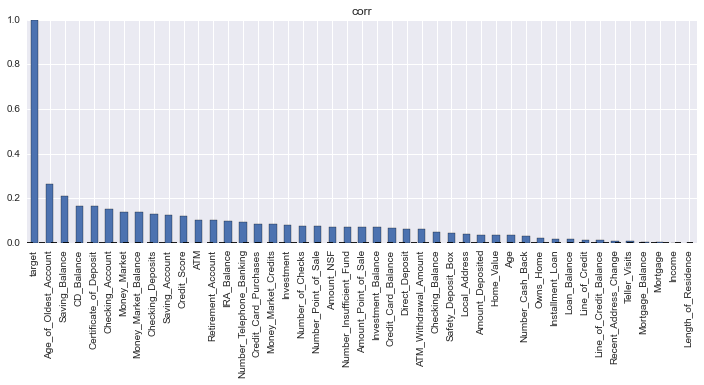

In [104]:
corr = model_data.corr(method="spearman").ix["target"].abs()
corr.sort(ascending=False)
corr.plot(kind='bar',title='corr',figsize=[12,4])

In [113]:
#使用信息增益 IG 判断优先用哪个属性构件树，构建n_estimator棵树，使用%多少的feature构建每棵树，每个分支最少包含5个样本就不用再分下去了
rfc=ensemble.RandomForestClassifier(criterion='entropy',n_estimators=5,max_features=0.5, min_samples_split=5)
rfc_model=rfc.fit(train_data,train_target)
rfc_model.feature_importances_

array([ 0.04341812,  0.03591462,  0.0059716 ,  0.03454278,  0.03804269,
        0.00254491,  0.0039828 ,  0.07705354,  0.26742815,  0.01256329,
        0.07515225,  0.01206108,  0.04336281,  0.0040026 ,  0.0015818 ,
        0.00045395,  0.02404843,  0.00515097,  0.00183024,  0.00442825,
        0.00541411,  0.01769085,  0.00211466,  0.08507018,  0.00422824,
        0.03384768,  0.01000846,  0.00986771,  0.00918228,  0.01941821,
        0.00138406,  0.00852888,  0.00388133,  0.00484609,  0.00164893,
        0.00473886,  0.00863053,  0.02371822,  0.00180822,  0.00210512,
        0.00220202,  0.03370162,  0.00805938,  0.00436949])

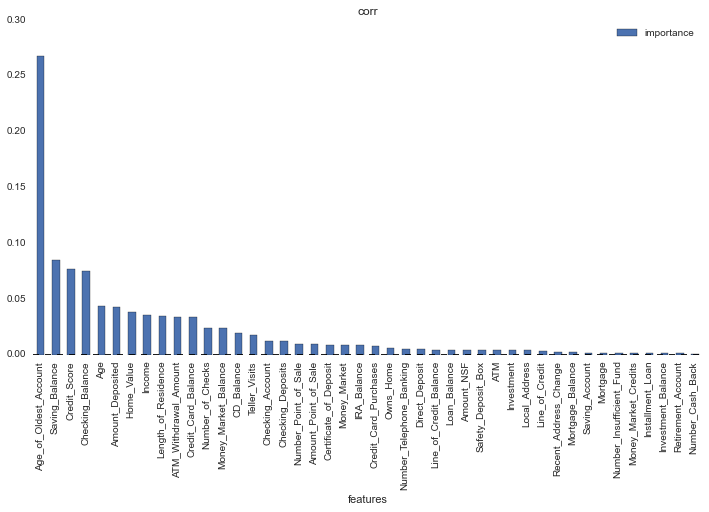

In [116]:
rfc_fi = pd.DataFrame()
rfc_fi["features"] = list(data.columns)
rfc_fi["importance"] = list(rfc_model.feature_importances_)
rfc_fi=rfc_fi.set_index("features",drop=True)
rfc_fi.sort_index(by="importance",ascending=False).plot(kind="bar",title="corr",figsize=[12,6])

In [152]:
a=rfc_fi.sort_index(by="importance",ascending=False)
a['corr_i']=corr.index[1:]  #corr.index[0] 是target, value 是1，比dataframe 多一个
a['corr_v']=corr.values[1:]
a #对比一下 随机森林和 spearman, pearson，cluster 对变量选择权重的不同

,importance,corr_i,corr_v
features,,,
Age_of_Oldest_Account,0.267428,Age_of_Oldest_Account,0.263923
Saving_Balance,0.085070,Saving_Balance,0.208230
Credit_Score,0.077054,CD_Balance,0.165733
Checking_Balance,0.075152,Certificate_of_Deposit,0.164201
Age,0.043418,Checking_Account,0.150614
Amount_Deposited,0.043363,Money_Market,0.139507
Home_Value,0.038043,Money_Market_Balance,0.138319
Income,0.035915,Checking_Deposits,0.131220
Length_of_Residence,0.034543,Saving_Account,0.124289


* 双变量分析

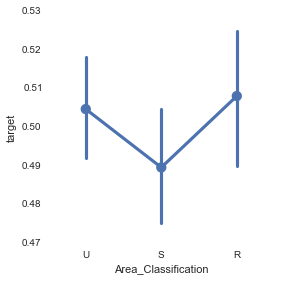

In [156]:
sns.factorplot("Area_Classification", "target", data=model_data)

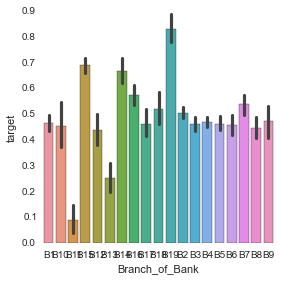

In [157]:
sns.factorplot("Branch_of_Bank", "target", data=model_data,kind='bar')

# 预测

In [160]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(train_data, train_target)
test_est = logistic_model.predict(test_data)
train_est = logistic_model.predict(train_data)
test_est_p = logistic_model.predict_proba(test_data)[:,1]
train_est_p = logistic_model.predict_proba(train_data)[:,1]

# 评估效果

In [168]:
#test_est
#type(test_data)
print train_data.ndim, train_data.shape

2 (8400, 44)
